# Modelo de Aprendizado

## Regressão Linear

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 7
sns.set_style('whitegrid')

alunos = pd.read_csv('enrollment_forecast.csv')
alunos.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']

### Regresão Linear nos dados

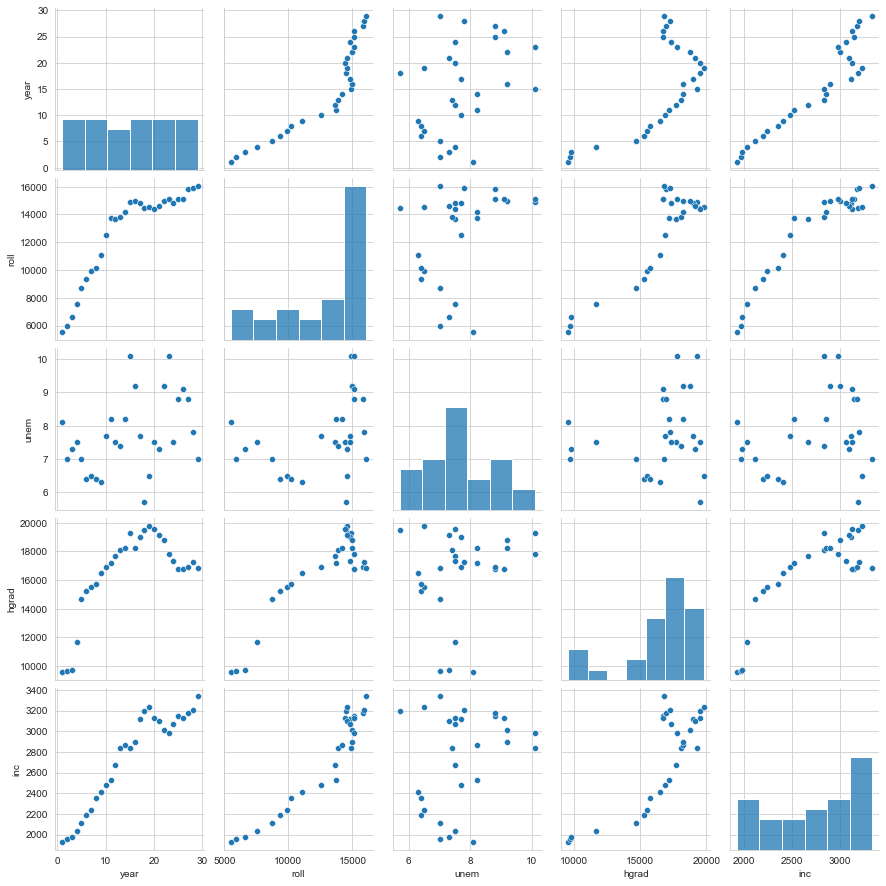

In [3]:
sns.pairplot(alunos)

In [4]:
# Verificando a correlação das variaveis
print(alunos.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [5]:
alunos_cols = ['unem','hgrad']
alunos_data = alunos[alunos_cols].values

alunos_target = alunos['roll'].values

X, y = scale(alunos_data), alunos_target

### Conferindo se há valores nulos

In [6]:
in_blank = X == np.NAN
X[in_blank == True]

array([], dtype=float64)

In [8]:
lin_reg = LinearRegression(normalize=True)

lin_reg.fit(X, y)

LinearRegression(normalize=True)

In [9]:
print(lin_reg.score(X, y))

0.8488812666133723


## Regressão logistica em MTCARS

In [10]:
# Importando Bibliotecas
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 8, 7
sns.set_style('whitegrid')

mtcars = pd.read_csv('mtcars.csv')
mtcars.rename(columns = {'Unnamed: 0' : 'modelo'}, inplace = True)

In [12]:
mtcars_cols = ['drat', 'carb']
mtcars_dados = mtcars[mtcars_cols].values

y = mtcars['am'].values

#### Verificanso se as variaveis são categóricas

<AxesSubplot:xlabel='drat', ylabel='carb'>

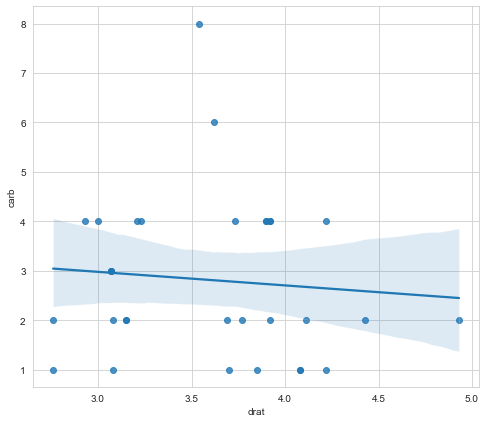

In [14]:
sns.regplot(x='drat', y='carb', data=mtcars, scatter=True)

#### Verificando se as variaveis são independentes

In [15]:
drat = mtcars['drat']
carb = mtcars['carb']

spearman, p = spearmanr(drat, carb)
print(spearman)

-0.1252229399201802


#### Conferindo se há valores nulos

In [16]:
mtcars.isnull().sum()

modelo    0
mpg       0
cyl       0
disp      0
hp        0
drat      0
wt        0
qsec      0
vs        0
am        0
gear      0
carb      0
dtype: int64

#### Conferindo se a variavel target é binário ou ordinal

<AxesSubplot:xlabel='am', ylabel='count'>

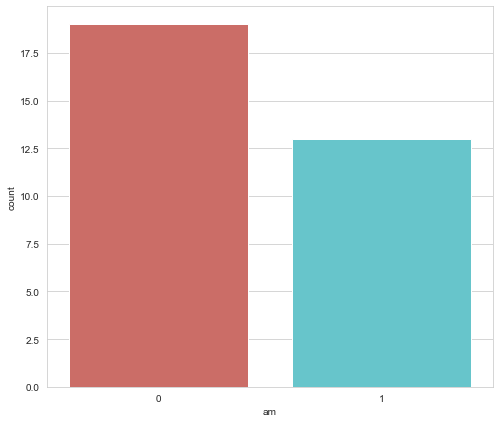

In [17]:
sns.countplot(x='am', data=mtcars, palette='hls')

#### Conferindo se o dado é grande

In [18]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   modelo  32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


#### Deploy e avaliação do modelo

In [19]:
X = scale(mtcars_dados)

In [20]:
reg_log = LogisticRegression().fit(X, y)
print(reg_log.score(X, y))

0.8125


In [22]:
y_predito = reg_log.predict(X)
print(classification_report(y, y_predito))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



## Aplicando Modelos Bayesianos

In [24]:
# carregando bibliotecas
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# carregando dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
raw_data = urllib.request.urlopen(url)
dados = np.loadtxt(raw_data, delimiter=",")
print(dados[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


### Naive Bayes

#### Usando Naive Bayes para predizer spam

In [25]:
X = dados[:, :48]

y = dados[:, -1]

In [28]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size=0.3, random_state=17)

In [29]:
GausNB = GaussianNB().fit(X_treino, y_treino)
print(GausNB)

y_predito = GausNB.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

GaussianNB()
0.8110065170166546


In [30]:
MultNB = MultinomialNB().fit(X_treino, y_treino)
print(MultNB)

y_predito = MultNB.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

MultinomialNB()
0.8747284576393918


In [31]:
BernNB = BernoulliNB(binarize=True).fit(X_treino, y_treino)
print(BernNB)

y_predito = BernNB.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

BernoulliNB(binarize=True)
0.8616944243301955


In [32]:
BernNB = BernoulliNB(binarize =.1).fit(X_treino, y_treino)
print(BernNB)

y_predito = BernNB.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

BernoulliNB(binarize=0.1)
0.8979000724112962
